In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')


In [44]:
df = pd.read_csv('/content/Boston.csv')
df.head(10)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [45]:
df.describe()
df.drop(columns=['Unnamed: 0'],axis=1)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [46]:
# finding ata types of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [47]:
# exploring null vales
df.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

In [48]:
#as we did not find any null data values we can go for next step that is finding the outliers.
# in order to find the outliers wether each column does have them or not lets visalize each column using box plot

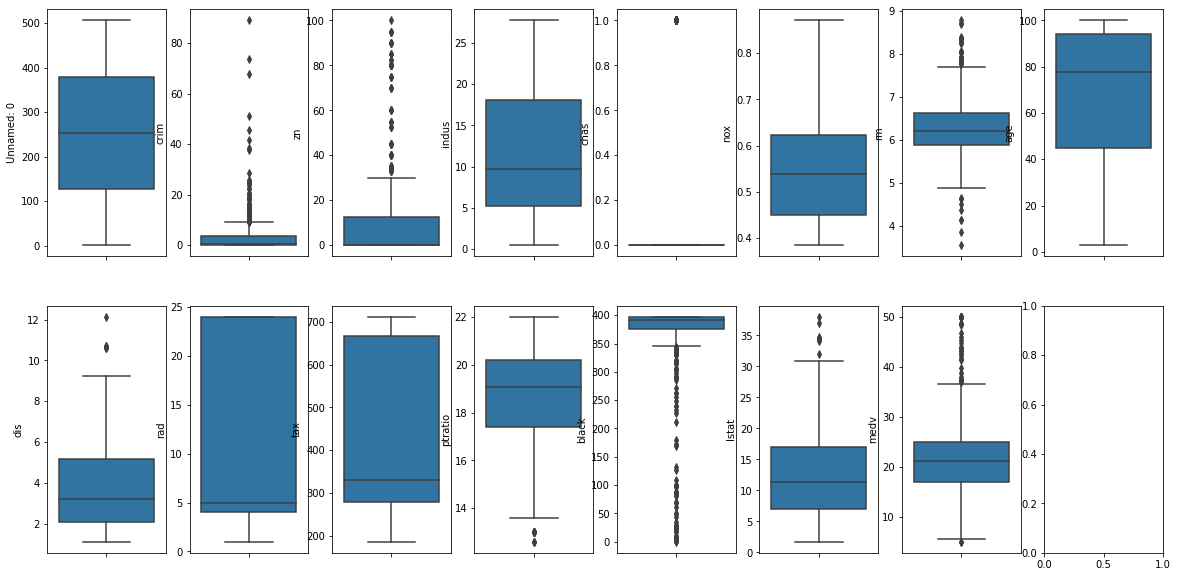

In [49]:
#Outlier detection
fig,ax = plt.subplots(ncols=8,nrows=2,figsize=(20,10))
ax= ax.flatten()

index=0
for col,value in df.items():
  sns.boxplot(y=col,data=df,ax=ax[index])
  index+=1



In [50]:
#now lets find the indices of the outliers and try to fill them with the mean or median. if threre are many outliers it is better to eliminate that column inorder to avoid confusion over data.
#we are doing the outlier detection beacause the data will not behave in a normal distribution in order to have the data in nrmal distribution we can do the normalization and following by standard scalar normalization.
#by doing the min max normlization we can have our data with in the range of 0 to 1. 
#by doing the standard scalar normalization we can tranform the data to behave norml distribution.



In [51]:
#now lets find the indesis and those corresponding values of outliers.
#in order to find the outliers we use the methods of inter quartile range and the kernal distribution expressions.
#for our case lets use the inter quartile range method.


In [59]:
(df.columns)

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [74]:
def outlier(x):
  percentile1 = np.percentile(x,25)
  percentile2 = np.percentile(x,75)
  diff = percentile2-percentile1
  floor = percentile1-1.5*diff
  ceiling = percentile2+1.5*diff
  indecis = x.index[(x<floor)|(x>ceiling)]
  values = x[indecis]
  



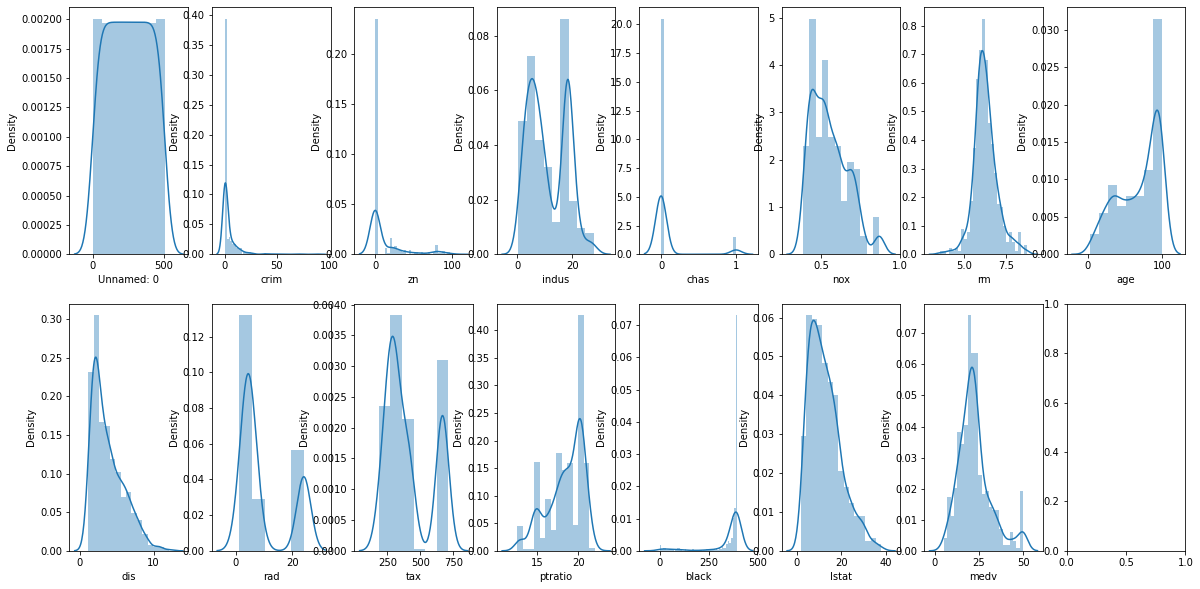

In [80]:
fig,ax = plt.subplots(ncols=8,nrows=2,figsize=(20,10))
ax=ax.flatten()
index=0
for i,j in df.items():
  sns.distplot(j,ax=ax[index])
  index +=1


In [81]:
#min max normalization


In [87]:
columns1 = ['crim','zn','indus','chas','age','dis','rad','tax','ptratio','black']
for i in columns1:
  minimum = min(df[i])
  maximum = max(df[i])
  df[i]= (df[i]-minimum)/(maximum-minimum)

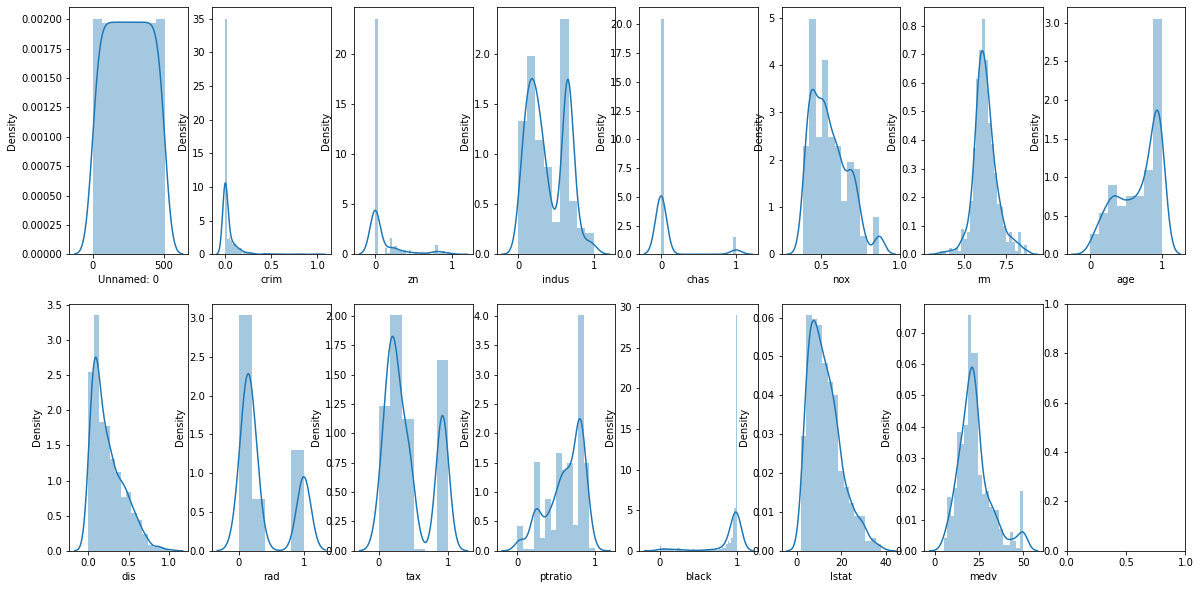

In [84]:
fig,ax = plt.subplots(ncols=8,nrows=2,figsize=(20,10))
ax=ax.flatten()
index=0
for col,value in df.items():
  sns.distplot(value,ax=ax[index])
  index+=1


In [85]:
#lets do the standard scalar

In [90]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

ss1 =ss.fit_transform(df[columns1])
ss2= pd.DataFrame(ss1,columns =columns1)
  

In [91]:
df[columns1]= ss2[columns1]

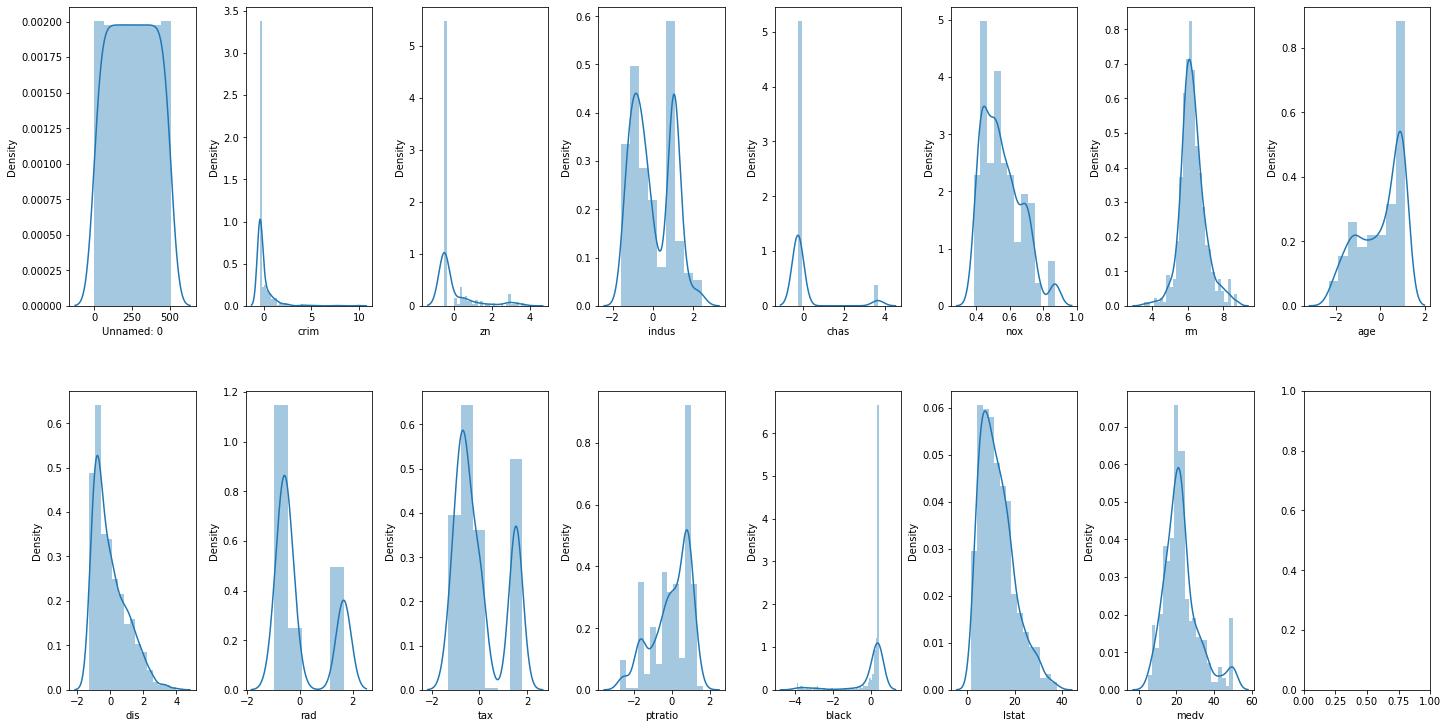

In [92]:
fig,ax = plt.subplots(ncols=8,nrows=2,figsize =(20,10))
ax= ax.flatten()
index=0
for col,values in df.items():
  sns.distplot(values,ax=ax[index])
  index+=1
  plt.tight_layout(pad=0.3,w_pad=0.6,h_pad=5.0)

In [ ]:
# next step is featue engineering in the feature engineering we increase the dimenssionality of the dat aset or else decrease the dimenssionality.
# in order to increase the dimenssionality we use the complex polynominal equaltuon.
#that is we find the interation using the excisted data to increase the dimenssionality.
#for increase the dimenssionality we do have a method in sklearn module.preprocessing that is polynominal featueres.
#to decrese the dimenssionalty again we do have a PCA in sklearn. decomposition module
#we also can do the feature selection from the sklearn.feature selection module.
#we will explore all of those in a bit

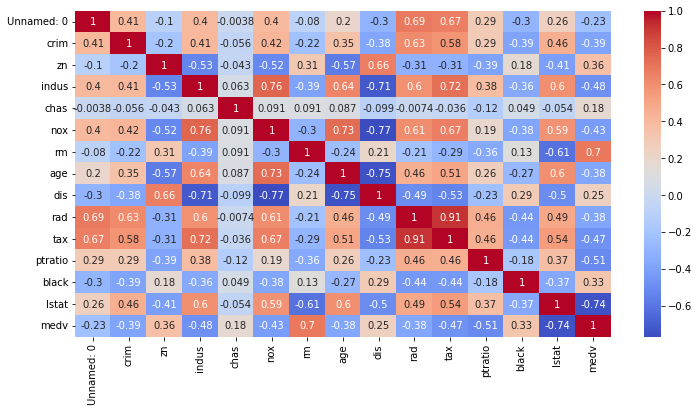

In [94]:
#lets explore some more data by using the correlation of the dataset
corr= df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True,cmap='coolwarm')

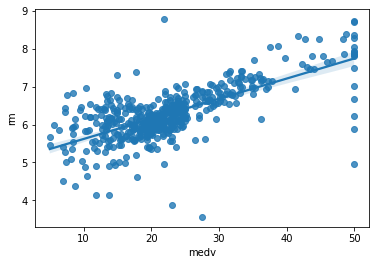

In [97]:
sns.regplot(y= df['rm'],x=df['medv'])

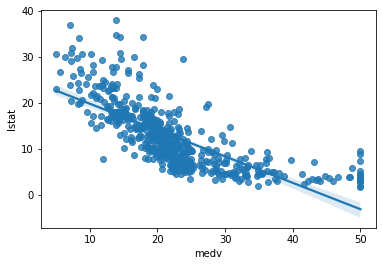

In [105]:
sns.regplot(y=df['lstat'],x=df['medv'])

In [132]:
#pca
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
dd = pd.DataFrame(pca.fit_transform(df))
dd.head(10)

,0,1,2,3,4,5,6,7,8,9
0,252.579771,0.819378,-4.726572,-0.842349,0.403477,0.457953,0.863777,0.955282,-0.006025,-0.282020
1,251.489135,-3.599068,-2.764654,-0.886719,0.054034,-0.162814,0.199524,0.235973,0.215743,-0.397948
2,250.743025,10.041367,0.642290,-1.469391,0.692995,-0.484431,-0.200219,-0.167578,0.270257,0.016870
3,249.741369,9.672693,-1.140182,-1.020918,0.822056,-0.525527,-0.708796,-0.481221,0.642496,0.068139
4,248.751093,10.599656,2.406453,-0.675435,0.855873,-0.712885,-0.817049,-0.595742,0.679489,-0.116878
5,247.644778,4.551814,-1.999445,-0.807961,0.537648,-0.438741,-0.537490,-0.325399,0.607927,-0.117649
6,246.467088,-4.273160,0.582057,0.303340,0.372268,0.313363,0.461488,0.686391,-0.362422,0.334303
7,245.441278,-4.704401,8.445407,1.240018,0.353269,-0.047640,0.289671,0.466905,-0.312456,-0.323316
8,244.152326,-19.478062,10.948898,3.071081,-0.097495,0.107319,0.399626,0.377011,-0.210856,-0.369602
9,243.351017,-10.146381,2.017232,1.075520,0.216252,0.404665,0.535484,0.648125,-0.366422,-0.228937


In [112]:
#feature selection
import sklearn.feature_selection

In [146]:
df1 = df.drop(columns= ['Unnamed: 0'],axis=1)
df2 = df['medv']
df1.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,-0.419782,0.284830,-1.287909,-0.272599,0.538,6.575,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,4.98,24.0
1,-0.417339,-0.487722,-0.593381,-0.272599,0.469,6.421,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,9.14,21.6
2,-0.417342,-0.487722,-0.593381,-0.272599,0.469,7.185,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,4.03,34.7
3,-0.416750,-0.487722,-1.306878,-0.272599,0.458,6.998,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,2.94,33.4
4,-0.412482,-0.487722,-1.306878,-0.272599,0.458,7.147,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,5.33,36.2


In [135]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df1,df2,test_size=0.25,random_state=42)

In [137]:
s = sklearn.feature_selection.SelectKBest(k=10)
s1 =s.fit(x_train,y_train)
s2 = s1.get_support(indices =True)
for i in s2:
  final =print(df1.columns[i])
  

crim
zn
indus
nox
rm
age
rad
tax
black
lstat


In [ ]:
list1 = ['crim','zn','indus','nox','rm','age','rad','tax','black','lstat']
data_frame = pd.DataFrame()
#nu = np.arange((0,10))
#for i in nu:
data_frame = x_train[list1]
data_frame.head(10)

In [166]:
data_frame2 = x_test[list1]
data_frame3 = pd.concat([data_frame,data_frame2],axis=0)
data_frame4 = pd.concat([y_train,y_test],axis=0)

In [173]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn. metrics import mean_squared_error
model = LinearRegression(normalize=True)
model.fit(data_frame,y_train)
predict =model.predict(data_frame2)
cross=cross_val_score(model,data_frame3,data_frame4,scoring='neg_mean_squared_error')
print(cross.mean())
#report=classification_report(predict,y_test)

-29.715711296777716


ValueError: ignored

In [ ]:
coff = pd.Series(model.coef_,data_frame3.columns).sort_values()
coff.plot(kind='bar')

-14.2994493937682
0.8354818458082646


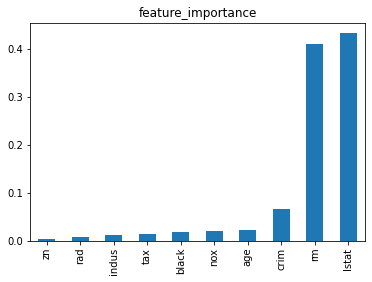

In [186]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor()
model.fit(data_frame,y_train)
series = pd.Series(model.feature_importances_,data_frame3.columns).sort_values()
series.plot(kind='bar',title ='feature_importance')
value = cross_val_score(model,data_frame3,data_frame4,scoring='neg_mean_squared_error')
print(value.mean())
#score = classification_report(predict,y_test)
score = model.score(data_frame2,y_test)
print(score)

In [187]:
from sklearn.model_selection import GridSearchCV
parameters ={'n_estimators':[400,500,600],'max_depth':[3,4,5]}
model = RandomForestRegressor()
grid = GridSearchCV(model,parameters)

In [188]:
grid.fit(data_frame,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5],
                         'n_estimators': [400, 500, 600]})

In [189]:
grid.best_params_

{'max_depth': 5, 'n_estimators': 600}

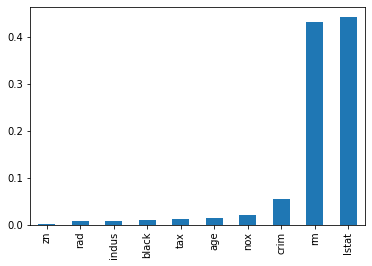

In [198]:
from sklearn.model_selection import GridSearchCV
#parameters ={'n_estimators':[600],'max_depth':[5]}
model = RandomForestRegressor(n_estimators=600,max_depth=5)
model.fit(data_frame,y_train)
coff = pd.Series(model.feature_importances_,data_frame3.columns).sort_values()
coff.plot(kind='bar')
